# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,314,90,42,63,126,55,7,152,45,19,142,173,336,173,81,0,15,180,184
1,500,101,56,100,204,62,12,227,30,25,178,231,757,204,73,0,11,186,197
2,349,89,40,69,147,58,6,132,50,18,137,155,260,151,61,16,6,203,209
3,730,101,55,107,200,61,11,225,30,25,178,228,730,204,74,8,35,187,201
4,336,89,44,76,125,54,10,156,44,20,151,163,352,176,76,12,12,184,193
5,582,108,53,104,181,56,11,220,31,25,167,226,712,214,72,15,18,189,199
6,759,94,50,84,138,57,10,156,44,20,170,171,351,187,77,5,6,182,191
7,237,85,45,65,128,56,8,151,45,19,145,170,332,186,81,1,10,179,184
8,242,85,42,59,132,58,7,149,46,19,144,166,320,172,83,8,4,179,182
9,13,89,42,85,144,58,10,152,44,19,144,173,345,161,72,8,13,187,197


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.903461,93.624772,44.752277,82.258652,169.380692,61.843352,8.466302,168.582878,40.936248,20.559199,147.746812,188.335155,438.520947,174.058288,72.167577,6.479053,12.599271,189.134791,195.843352
std,241.823041,7.928133,6.054544,15.710849,31.953931,7.090979,4.209961,32.793912,7.745350,2.560696,14.290636,30.376360,173.771480,32.051172,6.781870,4.962452,8.975823,5.985997,7.272151
min,0.000000,73.000000,33.000000,40.000000,105.000000,48.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,318.000000,149.000000,68.000000,3.000000,5.000000,185.000000,191.000000
50%,425.000000,93.000000,44.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,366.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,628.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,158.000000,216.000000,586.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,116.000000,58.000000,112.000000,322.000000,133.000000,55.000000,261.000000,61.000000,28.000000,182.000000,288.000000,998.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score, f1_score
from scikitplot.metrics import plot_roc

In [7]:
scaler = StandardScaler()
le = LabelEncoder()

In [8]:
# le.fit(y_train)
# y_train_le = le.transform(y_train)
# y_test_le = le.transform(y_test)
y_train_le = y_train
y_test_le = y_test

In [9]:
scaler.fit(data)
X_test_pd = pd.DataFrame(X_test)
X_train_pd_scaled = pd.DataFrame(scaler.transform(X_train_pd))
X_test_pd_scaled = scaler.transform(X_test_pd)

In [10]:
X_train_pd_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.444273,-0.446982,-0.464094,-1.211039,-1.283642,-0.849087,-0.340845,-0.506820,0.520843,-0.610954,-0.413510,-0.497997,-0.588439,-0.052366,1.141032,-1.297353,0.268958,-1.450029,-1.564671
1,0.317338,0.889655,1.806342,1.136348,1.048030,0.038833,0.746467,1.750495,-1.400524,1.705106,2.068039,1.350533,1.795639,0.900681,0.071877,-1.297353,-0.179173,-0.476052,0.183957
2,-0.300959,-0.568495,-0.788441,-0.830382,-0.655884,-0.468550,-0.558308,-1.108770,1.161299,-0.996965,-0.758169,-1.071679,-1.018819,-0.728722,-1.531855,1.957693,-0.739337,2.283552,1.798076
3,1.259116,0.889655,1.644168,1.580448,0.928457,-0.088012,0.529004,1.690300,-1.400524,1.705106,2.068039,1.254920,1.642741,0.900681,0.205522,0.330170,2.509613,-0.313722,0.721997
4,-0.354190,-0.568495,-0.139746,-0.386282,-1.313535,-0.975933,0.311542,-0.386429,0.392752,-0.224944,0.206877,-0.816709,-0.497833,0.039865,0.472810,1.143931,-0.067140,-0.800711,-0.354082


In [ ]:
### YOUR CODE HERE

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

In [186]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500.)

In [14]:
param_dist = {
        'C':uniform(loc=0, scale=5),
        'penalty':['l1', 'l2']
        }

In [15]:
clf = RandomizedSearchCV(log_reg, param_dist, random_state=0, cv=5, scoring='roc_auc_ovr')
search = clf.fit(X_train_pd_scaled, y_train_le)
new_params = search.best_params_
print(new_params)

{'C': 4.180393817686888, 'penalty': 'l1'}


In [16]:
log_reg_best = LogisticRegression(multi_class='multinomial', 
                                  solver='saga', 
                                  tol=1e-3, 
                                  max_iter=500., 
                                  **new_params
                                 )

In [17]:
log_reg.fit(X_train_pd_scaled, y_train_le)

LogisticRegression(max_iter=500.0, multi_class='multinomial', solver='saga',
                   tol=0.001)

In [18]:
log_reg_best.fit(X_train_pd_scaled, y_train_le)

LogisticRegression(C=4.180393817686888, max_iter=500.0,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)

In [19]:
preds_prob = log_reg.predict_proba(X_test_pd_scaled)
preds = log_reg.predict(X_test_pd_scaled)

preds_prob_best = log_reg_best.predict_proba(X_test_pd_scaled)
preds_best = log_reg_best.predict(X_test_pd_scaled)

In [20]:
print("default LogReg:")
print(f"roc_auc_score = {roc_auc_score(y_test_le, preds_prob, multi_class='ovr')}")
print(f"f1_score = {f1_score(y_test_le, preds, average='macro')}")
print("---------------")
print(f"LogReg with {search.best_params_}")
print(f"roc_auc_score = {roc_auc_score(y_test_le, preds_prob_best, multi_class='ovr')}")
print(f"f1_score = {f1_score(y_test_le, preds_best, average='macro')}")

default LogReg:
roc_auc_score = 0.9343440000817143
f1_score = 0.7720827031131178
---------------
LogReg with {'C': 4.180393817686888, 'penalty': 'l1'}
roc_auc_score = 0.9381660043976895
f1_score = 0.773897909767475


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

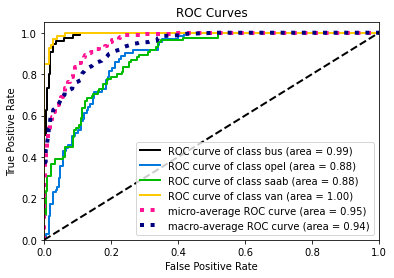

In [21]:
plot_roc(y_test_le, preds_prob_best)

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [94]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [95]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_pd_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'TARGET': y_train})], axis = 1)

In [96]:
finalDf = pd.concat([principalDf, pd.DataFrame({'TARGET': y_train})], axis = 1)

In [97]:
finalDf['TARGET'].unique()

array(['bus', 'opel', 'van', 'saab'], dtype=object)

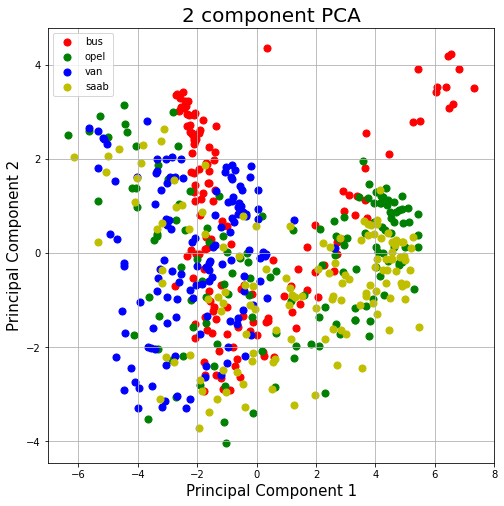

In [98]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['TARGET'].unique()
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [99]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train_pd_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, pd.DataFrame({'TARGET': y_train})], axis = 1)

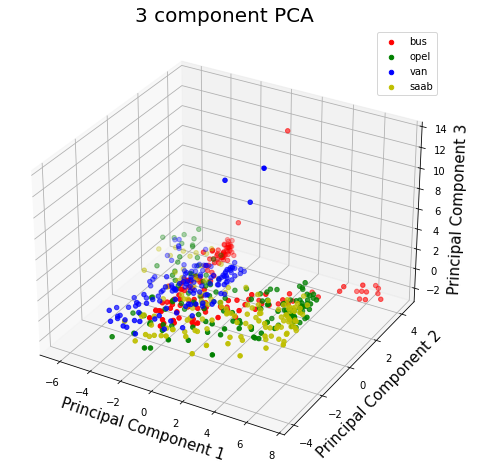

In [100]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = finalDf['TARGET'].unique()
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color)
ax.legend(targets)
plt.show()

In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [112]:
N_COMP = 4
pca = PCA(n_components=N_COMP)
X_train_pce = pca.fit_transform(X_train_pd_scaled)
X_test_pce = pca.transform(X_test_pd_scaled)

(297, 4)

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [296]:
from sklearn.pipeline import Pipeline

In [297]:
pipe = Pipeline([('scaler', StandardScaler()) , ('pca', PCA(n_components=5)), ('clf', log_reg)])

In [298]:
param_dist = {
        'pca__n_components':[2, 3, 4, 5],
        'clf__C':uniform(loc=0, scale=5),
        'clf__penalty':['l1', 'l2']
        }

randomized_search = RandomizedSearchCV(pipe, param_dist, random_state=0, cv=5, scoring='roc_auc_ovr')

In [299]:
clf = randomized_search.fit(X_train_pd_scaled, y_train_le)

In [300]:
clf.best_params_

{'clf__C': 3.0138168803582195, 'clf__penalty': 'l2', 'pca__n_components': 5}

In [301]:
pipe.set_params(**clf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf',
                 LogisticRegression(C=3.0138168803582195, max_iter=500.0,
                                    multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [302]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf',
                 LogisticRegression(C=3.0138168803582195, max_iter=500.0,
                                    multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [303]:
print(roc_auc_score(y_test, pipe.predict_proba(X_test), multi_class='ovr'))
print(f1_score(y_test, pipe.predict(X_test), average='macro'))

0.7402711568927386
0.4394757395976908


In [304]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [313]:
from sklearn.tree import DecisionTreeClassifier

pipe_dtc = Pipeline([('scaler', StandardScaler()) , ('pca', PCA(n_components=5)), ('clf', DecisionTreeClassifier())])

param_dist = {
        'pca__n_components':[5],
        'clf__max_depth':[3,4,5,6,7]
        }

randomized_search = RandomizedSearchCV(pipe, param_dist, random_state=0, cv=5, scoring='roc_auc_ovr')

In [314]:
grid_search_dtc = randomized_search.fit(X_train_pd_scaled, y_train_le)

/Users/yashinrostislav/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [315]:
grid_search_dtc.best_params_

{'pca__n_components': 5, 'clf__max_depth': 5}

In [316]:
pipe_dtc.set_params(**grid_search_dtc.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [317]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [318]:
print(roc_auc_score(y_test, pipe.predict_proba(X_test), multi_class='ovr'))
print(f1_score(y_test, pipe.predict(X_test), average='macro'))

0.7986536752384905
0.5674236700518406


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE